<h1>Dataset is for concrete features 
    <br> Purpose is to find best features combination against "Strength"
    <br> Try several methods to complete it</h1>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
path = r'dataset\concrete_data.csv'
df = pd.read_csv(path)

In [2]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
## get basic information about dataset
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


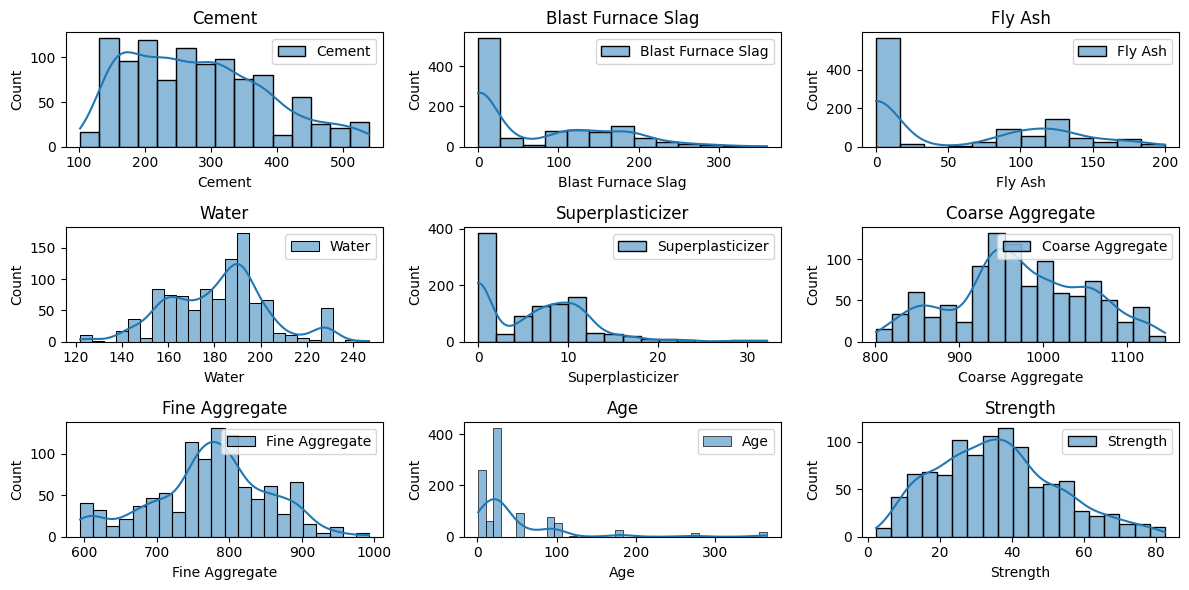

In [4]:
# check distribution for features to know which scaler could be use in this case we use MinMaxScaler
fig,ax = plt.subplots(3,3, figsize=(12,6))
cols = df.columns
ax = ax.flatten()
for i, col in enumerate(cols):
    sns.histplot(df[col], label=col, ax=ax[i], kde=True)
    ax[i].set_title(col)
    ax[i].legend()
    
plt.tight_layout()

## Using ML pacakge to find best K feartures

In [5]:
x = df.drop('Strength',axis=1)
y = df['Strength']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2)
print(xtrain.shape,xtest.shape)

(824, 8) (206, 8)


In [8]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Iterate feature numbers from 1 to 8 to check thier r2 and MSE respectively
r2 = []
MSE =[]
for x in range(1,9):
    selector = SelectKBest(score_func=f_regression, k=x)
    selector.fit(xtrain,ytrain)
    selected_train_x = selector.transform(xtrain)
    selected_test_x = selector.transform(xtest)

    lr = LinearRegression()
    lr.fit(selected_train_x,ytrain)
    ypredict = lr.predict(selected_test_x)

    msr = round(mean_squared_error(ytest, ypredict),3)
    r2score = round(r2_score(ytest, ypredict),3)
    MSE.append(msr)
    r2.append(r2score)

In [10]:
print(r2)
print(MSE)

[0.252, 0.371, 0.533, 0.556, 0.55, 0.634, 0.598, 0.628]
[192.785, 161.979, 120.271, 114.37, 115.936, 94.228, 103.458, 95.971]


In [11]:
# check adjusted R2 respectively
adjr2=[]
def adjusted_r_squared(r_squared, n, k):
    adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    return round(adj_r_squared,3)

colnumber = df.shape[1]

for col in range(0, colnumber-1): 
    r2score = r2[col]  # Assuming R-squared scores are 0-indexed in the list 'r2'
    adjr2.append(adjusted_r_squared(r2score, len(df), col))

In [12]:
print(adjr2)

[0.252, 0.37, 0.532, 0.555, 0.548, 0.632, 0.596, 0.625]


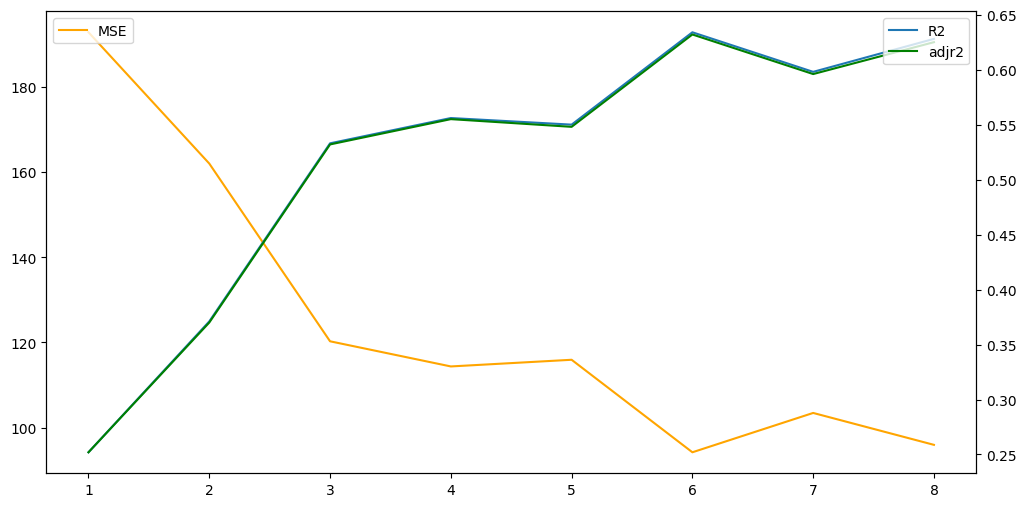

In [13]:
# Plot MSE and R2 and Adjusted R2 together
axisx = range(1,9)
y1 = r2
y2 = MSE
y3 = adjr2
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=axisx, y=y2,color='orange',label='MSE')
ax2 = ax.twinx()
sns.lineplot(x=axisx,ax=ax2, y=y1,label='R2')
sns.lineplot(x=axisx,ax=ax2, y=y3,label='adjr2',color='green')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

First observation: Both r2 and MSE have biggest turning point at features=3 so selecting 3 features could be the optimal choice
<br>Second observation: r2 and adjusted r2 don't change a lot in this case

In [14]:
selector = SelectKBest(k=3,score_func=f_regression)
selector.fit(xtrain,ytrain)
mask = selector.get_support()

In [15]:
cols = df.drop('Strength',axis=1).columns
cols[mask]

Index(['Cement', 'Superplasticizer', 'Age'], dtype='object')

In [16]:
# find out best 3 feature names
selector.get_feature_names_out()

array(['Cement', 'Superplasticizer', 'Age'], dtype=object)

<Axes: >

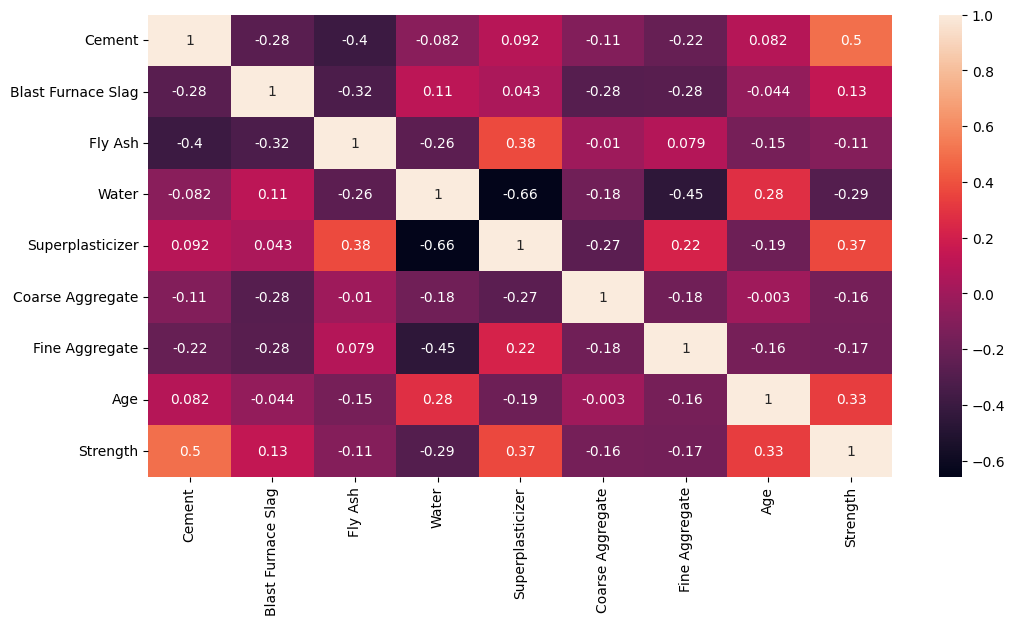

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

## Try using scaler and having cross validation to reduce overfitting

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, make_scorer

In [19]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

## Iterate feature used in dataset to see how much increase there will be when add more feature

In [20]:
lr = LinearRegression()
scaler = MinMaxScaler()
pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('BestK',SelectKBest(score_func=f_regression)),
    ('lrmodel',LinearRegression())
])
param_grid = {'BestK__k':range(1,9)}
gridcv = GridSearchCV(pipe,param_grid,cv=10,scoring=scorer)

In [21]:
gridcv.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('BestK',
                                        SelectKBest(score_func=<function f_regression at 0x000002D8A7D449D0>)),
                                       ('lrmodel', LinearRegression())]),
             param_grid={'BestK__k': range(1, 9)},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [22]:
results_df = pd.DataFrame(gridcv.cv_results_)

In [23]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_BestK__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004439,0.001982,0.001645,0.000718,1,{'BestK__k': 1},-238.945539,-226.887699,-241.905843,-210.400234,-228.326344,-199.789669,-226.927652,-163.673544,-227.978236,-184.847520,-214.968228,23.922802,8
1,0.002901,0.000484,0.001514,0.000657,2,{'BestK__k': 2},-234.449011,-221.321934,-253.936526,-191.356173,-189.645263,-168.615523,-213.435075,-132.933610,-201.844706,-164.617284,-197.215511,34.020049,7
2,0.003346,0.000748,0.000996,0.000049,3,{'BestK__k': 3},-195.945622,-207.797696,-197.550839,-138.700895,-149.401463,-124.960510,-147.162677,-105.346531,-140.490038,-117.559104,-152.491537,33.985904,6
3,0.003380,0.000599,0.001311,0.000542,4,{'BestK__k': 4},-189.834413,-194.206554,-183.586097,-140.521236,-145.296971,-130.796065,-146.816617,-101.140316,-137.134414,-116.317206,-148.564989,29.709672,5
4,0.002926,0.000280,0.001213,0.000402,5,{'BestK__k': 5},-181.450894,-194.492962,-185.594229,-139.326347,-134.231826,-124.516628,-142.688064,-102.384587,-133.240304,-118.136448,-145.606229,29.447426,4
5,0.003226,0.000615,0.001006,0.000047,6,{'BestK__k': 6},-144.706520,-164.222674,-162.568114,-140.102407,-124.903796,-95.124047,-105.192011,-102.056883,-118.343880,-106.093096,-126.331343,24.003304,3
6,0.003124,0.000424,0.001104,0.000328,7,{'BestK__k': 7},-144.589233,-145.048315,-163.439274,-124.582459,-116.719047,-83.401377,-103.251194,-109.802012,-108.802089,-105.206178,-120.484118,22.840030,2
7,0.003240,0.000458,0.001004,0.000030,8,{'BestK__k': 8},-147.250169,-135.228974,-152.220338,-123.428369,-96.363450,-82.272892,-93.809822,-102.649517,-106.652977,-105.524292,-114.540080,22.545432,1


<Axes: xlabel='param_BestK__k', ylabel='mean_test_score'>

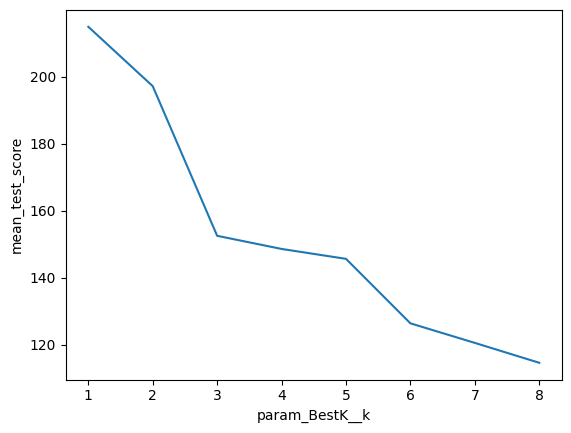

In [24]:
sns.lineplot(results_df, x='param_BestK__k', y=-results_df.mean_test_score)

In [25]:
# Remove scaler
lr = LinearRegression()
scaler = MinMaxScaler()
pipe1 = Pipeline([
    ('BestK',SelectKBest(score_func=f_regression)),
    ('lrmodel',LinearRegression())
])
param_grid = {'BestK__k':range(1,9)}
gridcv1 = GridSearchCV(pipe1,param_grid,cv=10,scoring=scorer)

In [26]:
gridcv1.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('BestK',
                                        SelectKBest(score_func=<function f_regression at 0x000002D8A7D449D0>)),
                                       ('lrmodel', LinearRegression())]),
             param_grid={'BestK__k': range(1, 9)},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [27]:
results_df1 = pd.DataFrame(gridcv1.cv_results_)
results_df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_BestK__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003281,0.000897,0.001314,0.001027,1,{'BestK__k': 1},-238.945539,-226.887699,-241.905843,-210.400234,-228.326344,-199.789669,-226.927652,-163.673544,-227.978236,-184.847520,-214.968228,23.922802,8
1,0.002413,0.000642,0.000705,0.000462,2,{'BestK__k': 2},-234.449011,-221.321934,-253.936526,-191.356173,-189.645263,-168.615523,-213.435075,-132.933610,-201.844706,-164.617284,-197.215511,34.020049,7
2,0.002288,0.000448,0.000700,0.000458,3,{'BestK__k': 3},-195.945622,-207.797696,-197.550839,-138.700895,-149.401463,-124.960510,-147.162677,-105.346531,-140.490038,-117.559104,-152.491537,33.985904,6
3,0.002300,0.000459,0.000800,0.000400,4,{'BestK__k': 4},-189.834413,-194.206554,-183.586097,-140.521236,-145.296971,-130.796065,-146.816617,-101.140316,-137.134414,-116.317206,-148.564989,29.709672,5
4,0.002300,0.000457,0.001032,0.000457,5,{'BestK__k': 5},-181.450894,-194.492962,-185.594229,-139.326347,-134.231826,-124.516628,-142.688064,-102.384587,-133.240304,-118.136448,-145.606229,29.447426,4
5,0.003286,0.000932,0.001165,0.000608,6,{'BestK__k': 6},-144.706520,-164.222674,-162.568114,-140.102407,-124.903796,-95.124047,-105.192011,-102.056883,-118.343880,-106.093096,-126.331343,24.003304,3
6,0.002481,0.000505,0.001021,0.000469,7,{'BestK__k': 7},-144.589233,-145.048315,-163.439274,-124.582459,-116.719047,-83.401377,-103.251194,-109.802012,-108.802089,-105.206178,-120.484118,22.840030,2
7,0.002520,0.000496,0.000983,0.000030,8,{'BestK__k': 8},-147.250169,-135.228974,-152.220338,-123.428369,-96.363450,-82.272892,-93.809822,-102.649517,-106.652977,-105.524292,-114.540080,22.545432,1


<Axes: xlabel='param_BestK__k', ylabel='mean_test_score'>

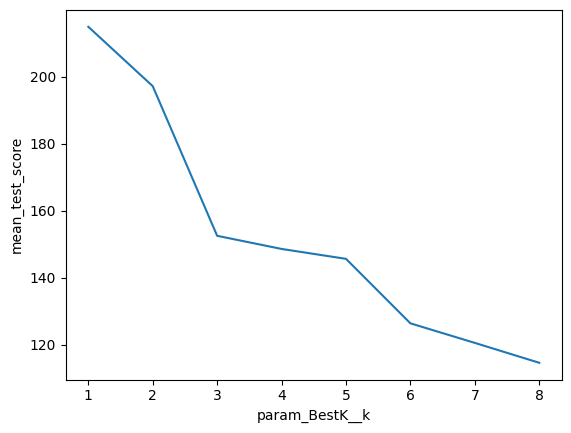

In [28]:
sns.lineplot(results_df1, x='param_BestK__k', y=-results_df.mean_test_score)

Third conclusion: After scaling we see at features=3 there is big turning point which could be considered as knee of the curve 
<br>so selecting features =3 is ideal to both get better result and keep resource spent minimal

In [29]:
selector = SelectKBest(score_func=f_regression, k=3)

In [30]:
selector.fit(xtrain,ytrain)

SelectKBest(k=3, score_func=<function f_regression at 0x000002D8A7D449D0>)

In [31]:
[feature for feature in selector.fit(xtrain,ytrain).get_feature_names_out()]

['Cement', 'Superplasticizer', 'Age']

Fourth conclusion: The 3 featurs worth prioritising are 'Cement', 'Superplasticizer', 'Age'